# **Introduction**
L’évaluation du risque de crédit est centrale en FinTech : elle permet aux banques et plateformes de prêt de savoir si un client a de fortes chances de rembourser. Aujourd’hui, l’IA joue un rôle clé, parce qu’elle apprend à partir des données (revenu, historique, comportement…) pour améliorer la qualité des décisions financières.
L’IA permet d’analyser rapidement de grandes quantités de données et d’améliorer la précision des décisions de prêt, ce qui aide à mieux identifier les clients à risque.

# **Objectifs de cette analyse**

- Identifier les facteurs qui influencent le risque de défaut.

- Préparer et nettoyer un dataset de risque de crédit.

- Construire deux modèles de classification (Logistic Regression & Random Forest).

- Évaluer les performances des modèles et interpréter les erreurs.

- Comparer les modèles et choisir celui qui prédit le mieux le risque.


# **Dataset Overview**

**Dataset** : credit_risk_dataset.csv

**Principales colonnes :**

- person_age : âge de l’emprunteur

- person_income : revenu annuel

- person_home_ownership : type de logement

- person_emp_length : ancienneté professionnelle

- loan_intent : but du prêt

- loan_grade : grade de crédit

- loan_amnt : montant du prêt

- loan_int_rate : taux d’intérêt

- loan_status : cible (0 = remboursé, 1 = défaut)

- loan_percent_income : ratio prêt / revenu

- cb_person_default_on_file : antécédents de défaut

- cb_person_cred_hist_length : ancienneté historique de crédit

# **Column Data Types**

**Numériques** : age, income, emp_length, loan_amnt, loan_int_rate…

**Catégorielles** : loan_intent, home_ownership, grade, default_on_file…

# **Importation des** **bibliotheques**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### **Preparations des donnees**

In [50]:
# Charger le dataset
data = pd.read_csv("/content/credit_risk_dataset - credit_risk_dataset.csv")
display(data.head())
print(data.info())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


# **Exploration des donnees**

## **Analyse descriptive**

In [51]:
# Statistiques descriptives
display(data.describe())
# Vérifier les valeurs manquantes
print(data.isnull().sum())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


## **Visualisation de la variable cible**

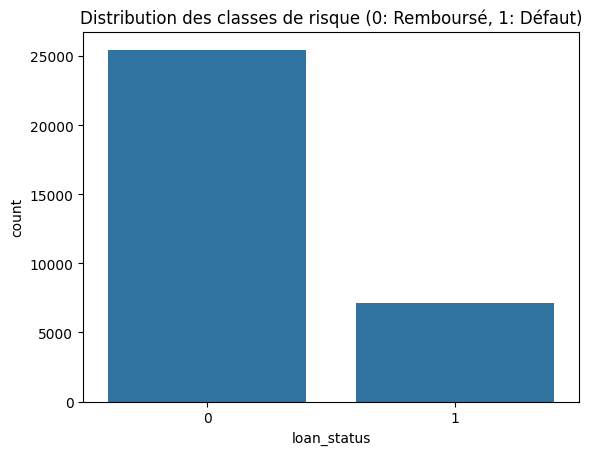

In [52]:
sns.countplot(x="loan_status", data=data)
plt.title("Distribution des classes de risque (0: Remboursé, 1: Défaut)")
plt.show()

### **Interprétation du graphique :**

Le graphique montre la distribution des classes de risque des prêts, où :

0 représente les prêts "Remboursés" (prêts avec un bon statut de paiement).

1 représente les prêts "En défaut" (prêts avec un statut de défaut).

### **Analyse :**

Prêts remboursés (0) : Il y a environ 25 000 prêts remboursés, ce qui constitue une grande majorité des prêts dans votre jeu de données.

Prêts en défaut (1) : Il y a environ 5 000 prêts en défaut, représentant une proportion beaucoup plus faible des prêts.


> Environ 80% des prêts sont remboursés avec succès, tandis qu'une proportion plus faible d'environ 20% des prêts sont en défaut. Cela suggère que la majorité des emprunteurs respectent leurs engagements de remboursement, mais il existe néanmoins un risque associé aux prêts en défaut, qu'il convient d'examiner de plus près.

# **Visualisation des relations**

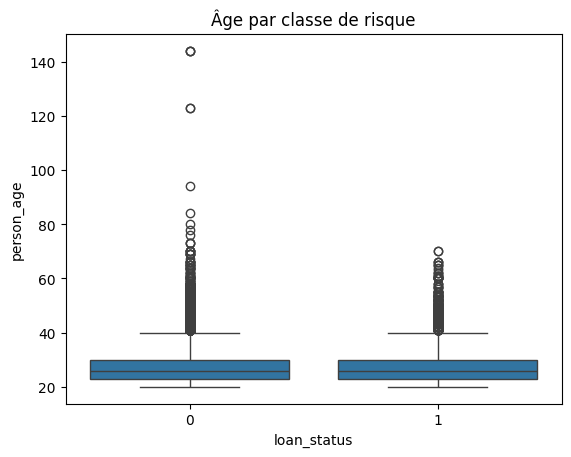

In [53]:
sns.boxplot(x="loan_status", y="person_age", data=data)
plt.title("Âge par classe de risque")
plt.show()

# **Interpretation** :
Le graphique compare la répartition de l’âge entre les clients non risqués (loan_status = 0) et les clients risqués (loan_status = 1). On observe que les deux groupes ont pratiquement la même distribution : la majorité des clients ont un âge compris entre 23 et 35 ans, avec une médiane similaire dans les deux classes. Cela montre que l’âge n’est pas une variable fortement discriminante pour distinguer les bons payeurs des clients risqués.

On note également la présence de plusieurs valeurs aberrantes (outliers), notamment des âges supérieurs à 80 ans et même au-delà de 120 ans, ce qui est très probablement lié à des erreurs de saisie dans le dataset. Ces valeurs extrêmes peuvent influencer négativement le modèle et devraient être traitées (suppression ou correction).

# **Prétraitement des données**

**Gérer les valeurs manquantes**

In [54]:
# Imputation : médiane pour numériques, mode pour catégoriques
data = data.fillna(data.median(numeric_only=True))
data = data.fillna(data.mode().iloc[0])
print(data.isnull().sum()) # Vérifier qu'il n'y a plus de valeurs manquantes

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


Le code **print(data.isnull().sum())** montre que toutes les valeurs manquantes ont été traitées, car le nombre de valeurs manquantes par colonne est désormais égal à zéro. Cela signifie qu'il n'y a plus de valeurs manquantes dans le jeu de données après l'imputation.

### **Encoder les variables catégoriques**

In [55]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade',
'cb_person_default_on_file']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
display(data_encoded.head())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


In [56]:
display(data_encoded.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

### **Standardiser les variables numériques**

In [57]:
scaler = StandardScaler()
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
# Affichez les premières lignes des données après standardisation
display(data_encoded[numerical_columns].head())


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-0.903374,-0.114143,28.926614,4.019404,1.625921,3.931411,-0.691554
1,-1.060904,-0.911147,0.056763,-1.358650,0.042310,-0.657458,-0.938167
2,-0.430783,-0.911147,-0.921876,-0.646849,0.603713,3.744110,-0.691554
3,-0.745843,-0.009274,-0.187897,4.019404,1.369558,3.369508,-0.938167
4,-0.588313,-0.188358,0.790742,4.019404,1.058028,3.556809,-0.444942


### **Division de data set**

In [58]:
# Séparation des données en variables explicatives (X) et cible (y)
X = data_encoded.drop("loan_status", axis=1)
y = data_encoded["loan_status"]
# Normalisation des colonnes numériques
X[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
# Division du dataset en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42, stratify=y
)

In [59]:
# Vérifiez les dimensions des ensembles d'entraînement et de test
print("Dimensions de X_train:", X_train.shape)
print("Dimensions de X_test:", X_test.shape)
print("Dimensions de y_train:", y_train.shape)
print("Dimensions de y_test:", y_test.shape)

Dimensions de X_train: (26064, 22)
Dimensions de X_test: (6517, 22)
Dimensions de y_train: (26064,)
Dimensions de y_test: (6517,)


# **Modelisation avec IA**

### **Entraîner une régression logistique**

In [60]:
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
display("Régression logistique :")
print(classification_report(y_test, lr_predictions))

'Régression logistique :'

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5095
           1       0.55      0.78      0.65      1422

    accuracy                           0.81      6517
   macro avg       0.74      0.80      0.76      6517
weighted avg       0.85      0.81      0.82      6517



### **Entraîner un Random Forest**

In [61]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest :")
print(classification_report(y_test, rf_predictions))

Random Forest :
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.97      0.72      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



### **Visualiser la matrice de confusion**

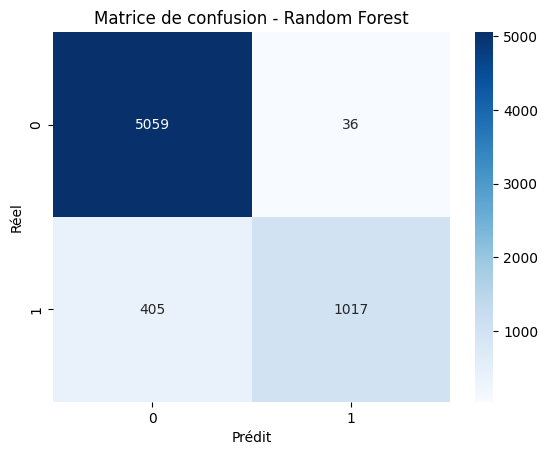

Random Forest :
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.97      0.72      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



In [62]:
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()
print("Random Forest :")
print(classification_report(y_test, rf_predictions))

# **Interpretation de la matrice de confision** :
La matrice de confusion du modèle Random Forest montre qu’il prédit très bien les deux classes : il identifie correctement la grande majorité des clients non risqués (5059) et une part importante des clients risqués (1017). Il commet très peu de faux positifs (36), ce qui signifie qu’il ne refuse presque jamais un bon client. En revanche, il produit encore un nombre notable de faux négatifs (405), c’est-à-dire des clients réellement risqués que le modèle classe comme sûrs, ce qui peut représenter un risque financier pour la banque. Globalement, le modèle est performant, mais il pourrait être amélioré pour mieux détecter les clients à haut risque.

## **Analyser l'importance des variables**

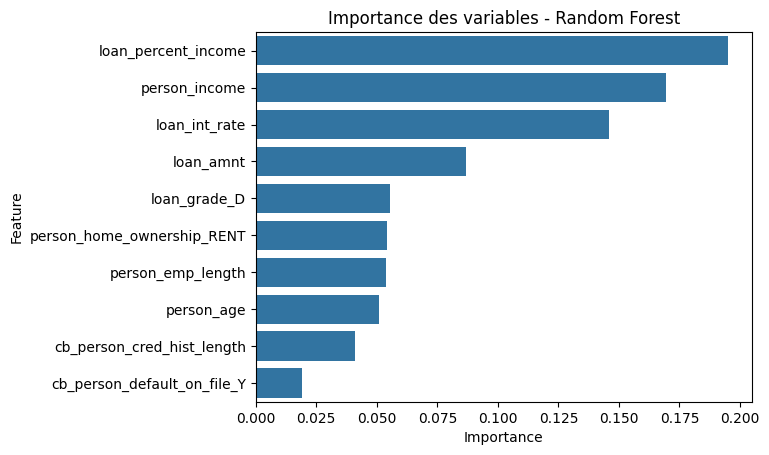

In [63]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10))
plt.title("Importance des variables - Random Forest")
plt.show()

**Les 5 variables les plus importantes :**

loan_percent_income

person_income

loan_int_rate

loan_amnt

loan_grade_D

# **Interprétation dans un contexte FinTech & Livrable final**
**Analyse des erreurs**

Dans l’évaluation du risque de crédit, deux types d’erreurs peuvent arriver :

Faux positifs (FP) : la banque accorde un prêt à quelqu’un qui ne remboursera pas.

Faux négatifs (FN) : la banque refuse un prêt à un client fiable.
  > Une banque perd surtout de l’argent quand elle prête à la mauvaise personne. Un client qui fait défaut crée une perte directe (capital + intérêts). Refuser un bon client (FN), ça fait rater un gain potentiel… mais ça ne fait pas perdre d’argent déjà investi.

Les faux positifs sont les plus coûteux pour une banque, car accorder un prêt à un mauvais payeur entraîne une perte financière directe, alors qu’un faux négatif ne génère qu’un manque à gagner.
